In [1]:
import pandas as pd

# Load the CSV file
file_path = 'california_monthly_county_wildfire_acreage.csv'
df = pd.read_csv(file_path)

# Get the column names
column_names = df.columns.tolist()
print(column_names)

['county', 'year', 'month', 'wildfire_acres']


find missing values

In [2]:
import pandas as pd

# Load the CSV file
file_path = 'california_monthly_county_wildfire_acreage.csv'
df = pd.read_csv(file_path)

# Find missing values in each column
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
county              0
year               78
month             115
wildfire_acres      0
dtype: int64


find which county has the highest number of wildfire_acres value each year

In [3]:
import pandas as pd

# Load the CSV file
file_path = 'california_monthly_county_wildfire_acreage.csv'
df = pd.read_csv(file_path)

# Group by 'year' and find the county with the highest 'wildfire_acres' each year
result = df.loc[df.groupby('year')['wildfire_acres'].idxmax(), ['year', 'county', 'wildfire_acres']]

print(result)

        year          county  wildfire_acres
2702  2000.0          Tulare    79682.137350
1210  2001.0           Modoc    23344.655332
2709  2002.0          Tulare   149863.581480
1951  2003.0       San Diego   378899.417286
772   2004.0     Los Angeles    33995.438000
1848  2005.0  San Bernardino    76385.253557
2888  2006.0         Ventura   148995.200457
1978  2007.0       San Diego   333585.220213
1336  2008.0        Monterey   240229.742670
809   2009.0     Los Angeles   163309.309201
814   2010.0     Los Angeles    13662.283420
556   2011.0            Kern    93449.059250
723   2012.0          Lassen   272212.273804
2838  2013.0        Tuolumne   250543.742965
2442  2014.0        Siskiyou   133447.269790
2683  2015.0         Trinity   171148.769460
1367  2016.0        Monterey   132209.075200
2958  2017.0         Ventura   234585.548230
680   2018.0            Lake   321429.482762
2531  2019.0          Sonoma    77239.988934


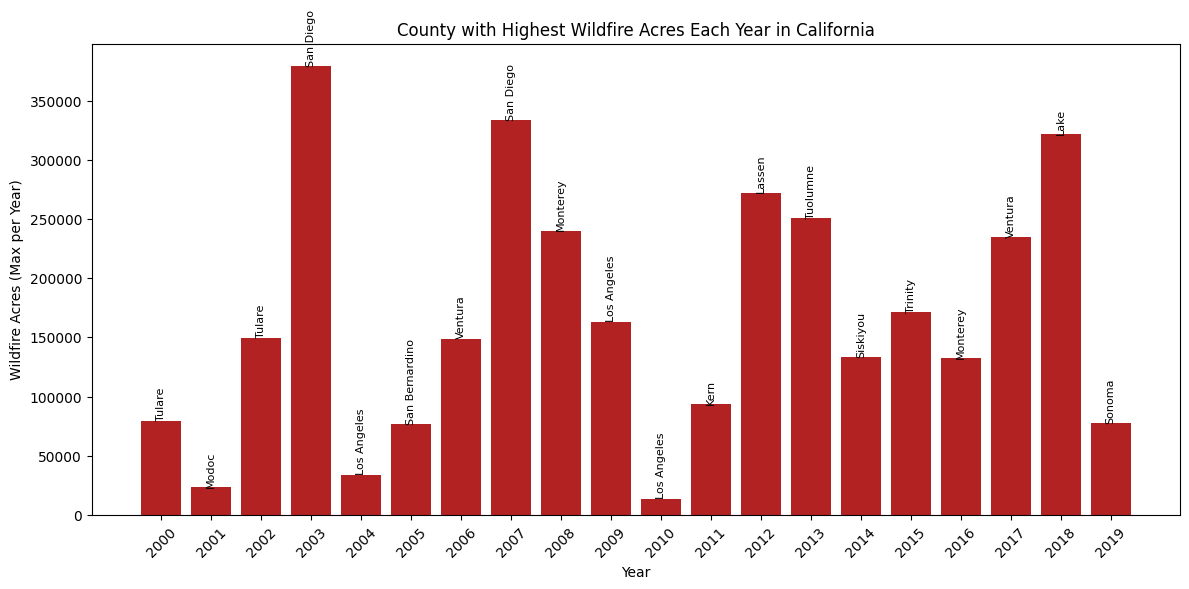

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'california_monthly_county_wildfire_acreage.csv'
df = pd.read_csv(file_path)

# Drop rows where 'year' or 'wildfire_acres' is missing
df_clean = df.dropna(subset=['year', 'wildfire_acres'])

# For each year, find the county with the highest wildfire_acres
idx = df_clean.groupby('year')['wildfire_acres'].idxmax()
top_counties = df_clean.loc[idx, ['year', 'county', 'wildfire_acres']].sort_values('year')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_counties['year'].astype(int), top_counties['wildfire_acres'], color='firebrick')
plt.xticks(top_counties['year'].astype(int), rotation=45)
plt.xlabel('Year')
plt.ylabel('Wildfire Acres (Max per Year)')
plt.title('County with Highest Wildfire Acres Each Year in California')
for i, row in top_counties.iterrows():
    plt.text(row['year'], row['wildfire_acres'], row['county'], ha='center', va='bottom', fontsize=8, rotation=90)
plt.tight_layout()
plt.show()
